# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set()

# import dataset

In [2]:
data = pd.read_csv('IceCreamData.csv')

In [3]:
data.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [4]:
data.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [6]:
data.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# visualizing data

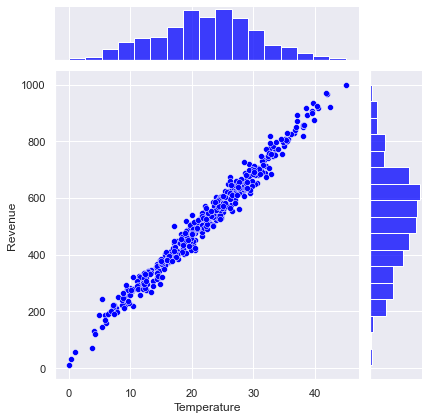

In [7]:
sns.jointplot(data = data, x = 'Temperature', y = 'Revenue', color = 'blue')

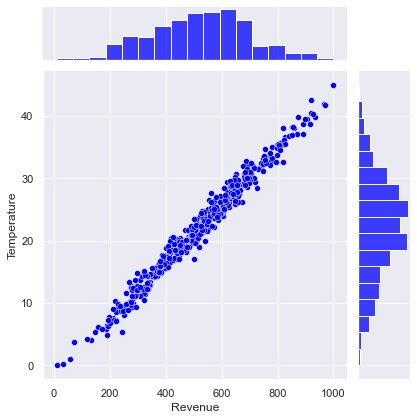

In [8]:
sns.jointplot(data = data, y = 'Temperature', x = 'Revenue', color = 'blue')

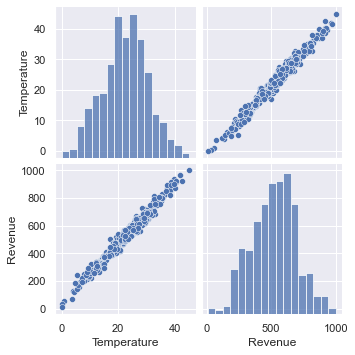

In [9]:
sns.pairplot(data)

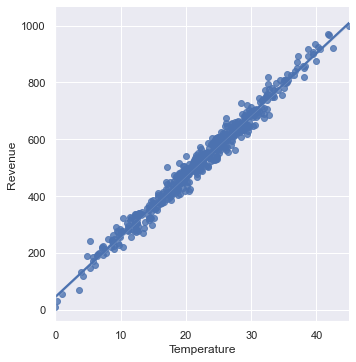

In [10]:
sns.lmplot(data = data, x = 'Temperature', y = 'Revenue')

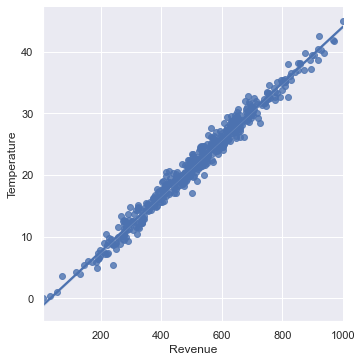

In [11]:
sns.lmplot(data = data, y = 'Temperature', x = 'Revenue')

# spliting dataset into test and train set

In [12]:
X = data[['Temperature']]

In [13]:
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [14]:
y = data['Revenue']

In [15]:
y

0      534.799028
1      625.190122
2      660.632289
3      487.706960
4      316.240194
          ...    
495    524.746364
496    755.818399
497    306.090719
498    566.217304
499    655.660388
Name: Revenue, Length: 500, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Traing the model

In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept = True)
reg.fit(X_train,y_train)

LinearRegression()

In [19]:
print('Linear model Coefficient (m)', reg.coef_)
print('Linear model Coefficient (b)', reg.intercept_)

Linear model Coefficient (m) [21.38197386]
Linear model Coefficient (b) 46.804641277423684


# testing the model

In [20]:
y_predict = reg.predict(X_test)

In [21]:
y_predict

array([681.93870622, 632.14474995, 559.64360486, 498.90609993,
       615.45939165, 304.72417213, 285.79420948, 315.60842003,
       506.26427154, 685.69744019, 723.96030494, 400.84625166,
       431.61634142, 671.36600031,  52.51422053, 198.77682819,
       523.08595488, 563.90495549, 583.83579144, 682.24517768,
       556.2285085 , 783.88766163, 655.44109362, 570.0735459 ,
       912.21841974, 664.74778505, 315.96428407, 631.00983241,
       731.1169322 , 698.02984963, 435.08453949, 471.22058847,
       710.29440571, 799.81874771, 641.02153776, 493.66044553,
       744.9247237 , 318.10831232, 262.69083171, 132.04437543,
       582.55738268, 230.41054193, 547.29799783, 393.00654153,
       436.66704225, 593.02780835, 572.09312165, 125.16251036,
       474.79444877, 530.45025905, 623.19251713, 503.4813544 ,
       484.60103791, 498.58705266, 551.22738648, 630.80646076,
       573.12703075, 679.486141  , 171.29759926, 660.49458416,
       583.75017395, 704.57274239, 535.82240023, 630.12

In [22]:
y_test

361    659.873287
73     623.248701
374    559.135869
155    497.752318
104    627.901841
          ...    
347    564.310532
86     643.944327
75     653.986736
438    412.082357
15     469.909033
Name: Revenue, Length: 100, dtype: float64

Text(0.5, 1.0, 'Revenue Generated vs Temperature(training set)')

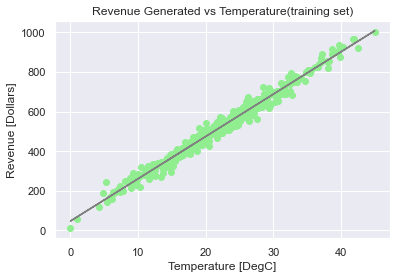

In [23]:
plt.scatter(X_train,y_train,color = 'lightgreen')
plt.plot(X_train,reg.predict(X_train), color = 'grey')
plt.ylabel('Revenue [Dollars]')
plt.xlabel('Temperature [DegC]')
plt.title('Revenue Generated vs Temperature(training set)')

Text(0.5, 1.0, 'Revenue Generated vs Temperature(testing set)')

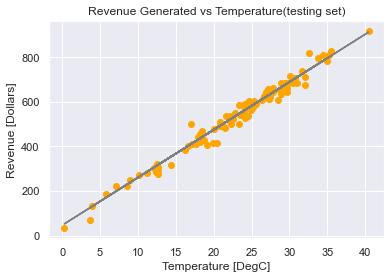

In [24]:
plt.scatter(X_test,y_test,color = 'orange')
plt.plot(X_test,reg.predict(X_test), color = 'grey')
plt.ylabel('Revenue [Dollars]')
plt.xlabel('Temperature [DegC]')
plt.title('Revenue Generated vs Temperature(testing set)')

# predicting

In [60]:
t = pd.DataFrame(np.array([48]))
revenue = reg.predict(t)

In [61]:
revenue

array([1073.13938633])

# accuracy

In [52]:
from sklearn.metrics import r2_score

acc = np.round(r2_score(y_test,y_predict)*100,2)

In [55]:
print(f'accuracy of model : {acc}%')

accuracy of model : 97.72%
